# Importing Data

In [14]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,QuantileTransformer
%matplotlib inline

DF=pd.read_csv('dataR2.csv')
DF.head(10)
DF=DF.sample(frac=1).reset_index(drop=True)
DF

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,59,28.672626,77,3.188,0.605507,17.0220,16.440480,31.69040,910.489,2
1,85,26.600000,96,4.462,1.056602,7.8500,7.931700,9.61350,232.006,1
2,71,27.915519,104,18.200,4.668907,53.4997,1.656020,49.24184,256.001,2
3,35,35.250761,90,6.817,1.513374,50.6094,6.966895,22.03703,667.928,1
4,72,23.620000,105,4.420,1.144780,21.7800,17.860000,4.82000,195.940,2
...,...,...,...,...,...,...,...,...,...,...
111,66,31.238590,82,4.181,0.845677,16.2247,4.267105,3.29175,634.602,1
112,75,30.480000,152,7.010,2.628283,50.5300,10.060000,11.73000,99.450,2
113,81,31.640368,100,9.669,2.385020,38.8066,10.636525,29.55830,426.175,2
114,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1


# One Feature Plots

Age


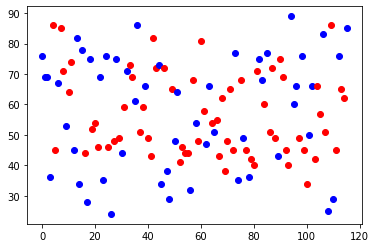

BMI


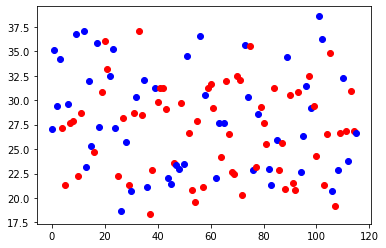

Glucose


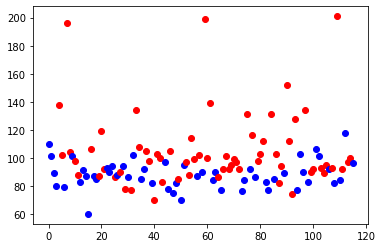

Insulin


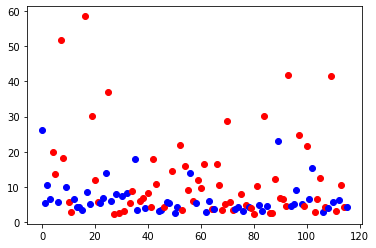

HOMA


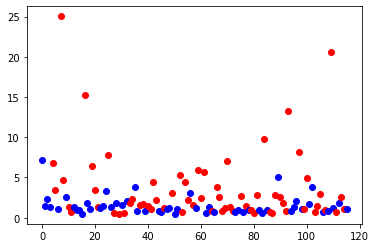

Leptin


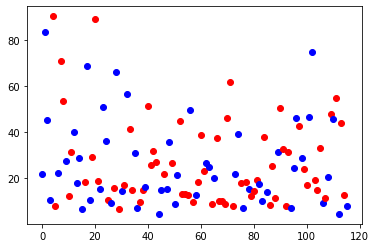

Adiponectin


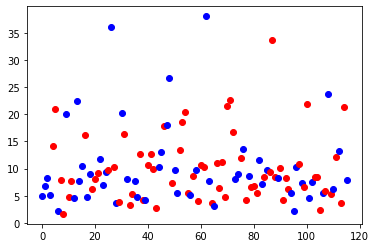

Resistin


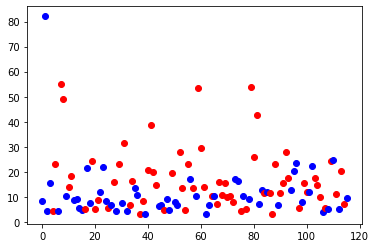

MCP.1


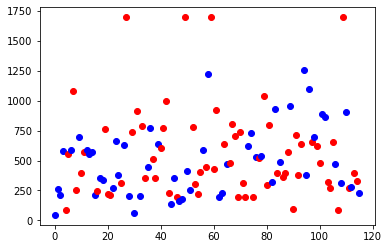

Classification


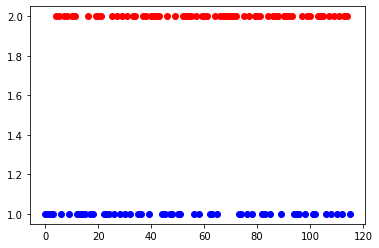

In [2]:
XofFeatures=np.arange(DF.shape[0])
for column in DF.columns:
    for i in XofFeatures:
        if DF.loc[i,'Classification']==1:
            plt.plot(XofFeatures[i],DF.loc[i,column],'bo')
        elif DF.loc[i,'Classification']==2:
            plt.plot(XofFeatures[i],DF.loc[i,column],'ro')
    print(column)
    plt.show()


# Two Features Plots

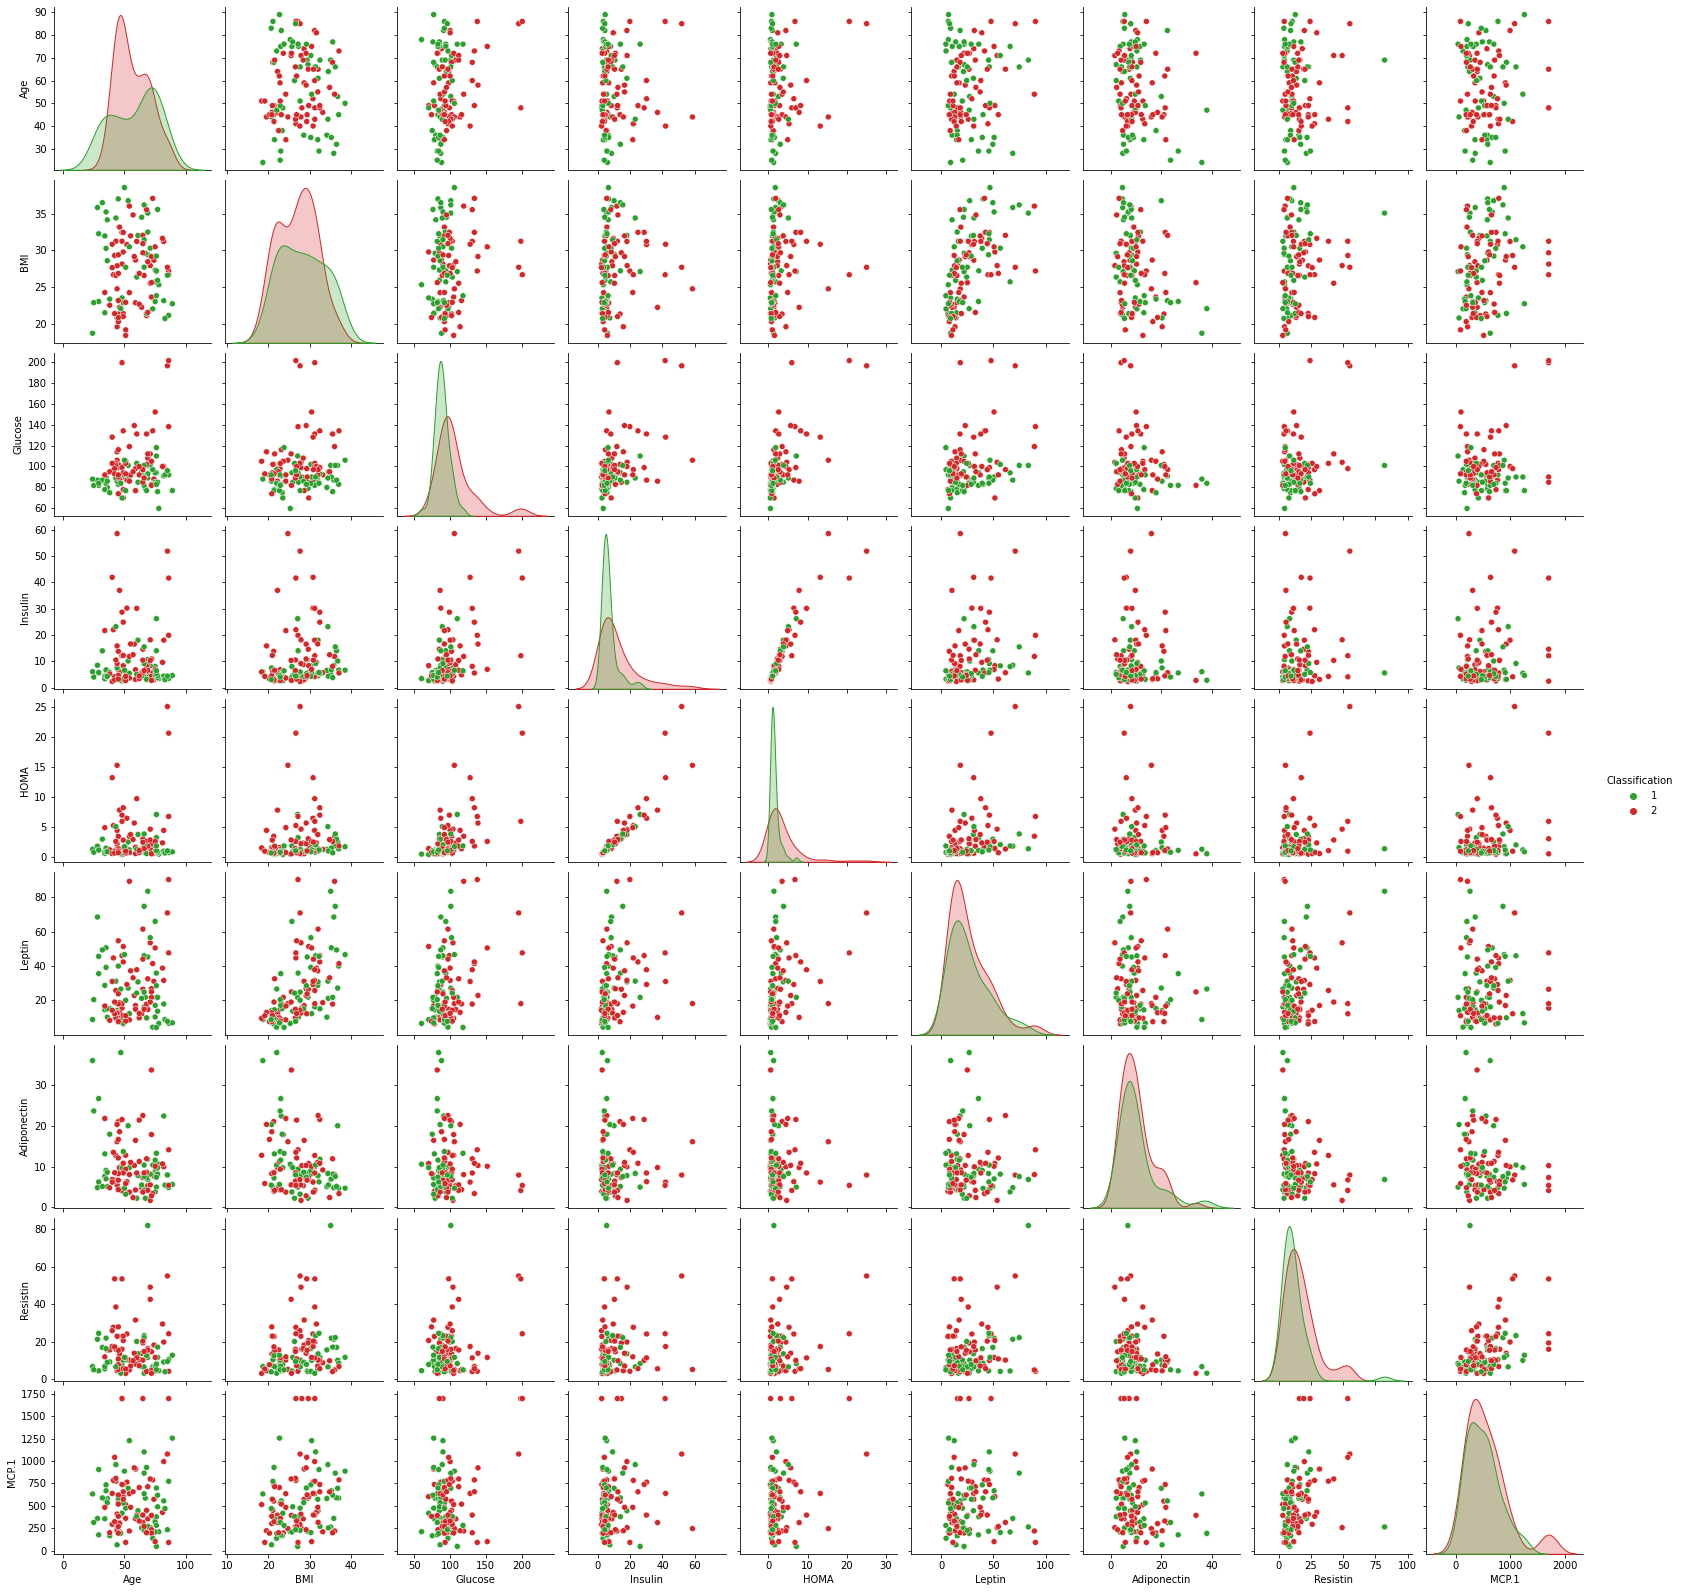

In [3]:
sns.pairplot(DF,hue='Classification',palette={1:"tab:green",2:"tab:red"})

# Two Features Plots (StandardScaler)

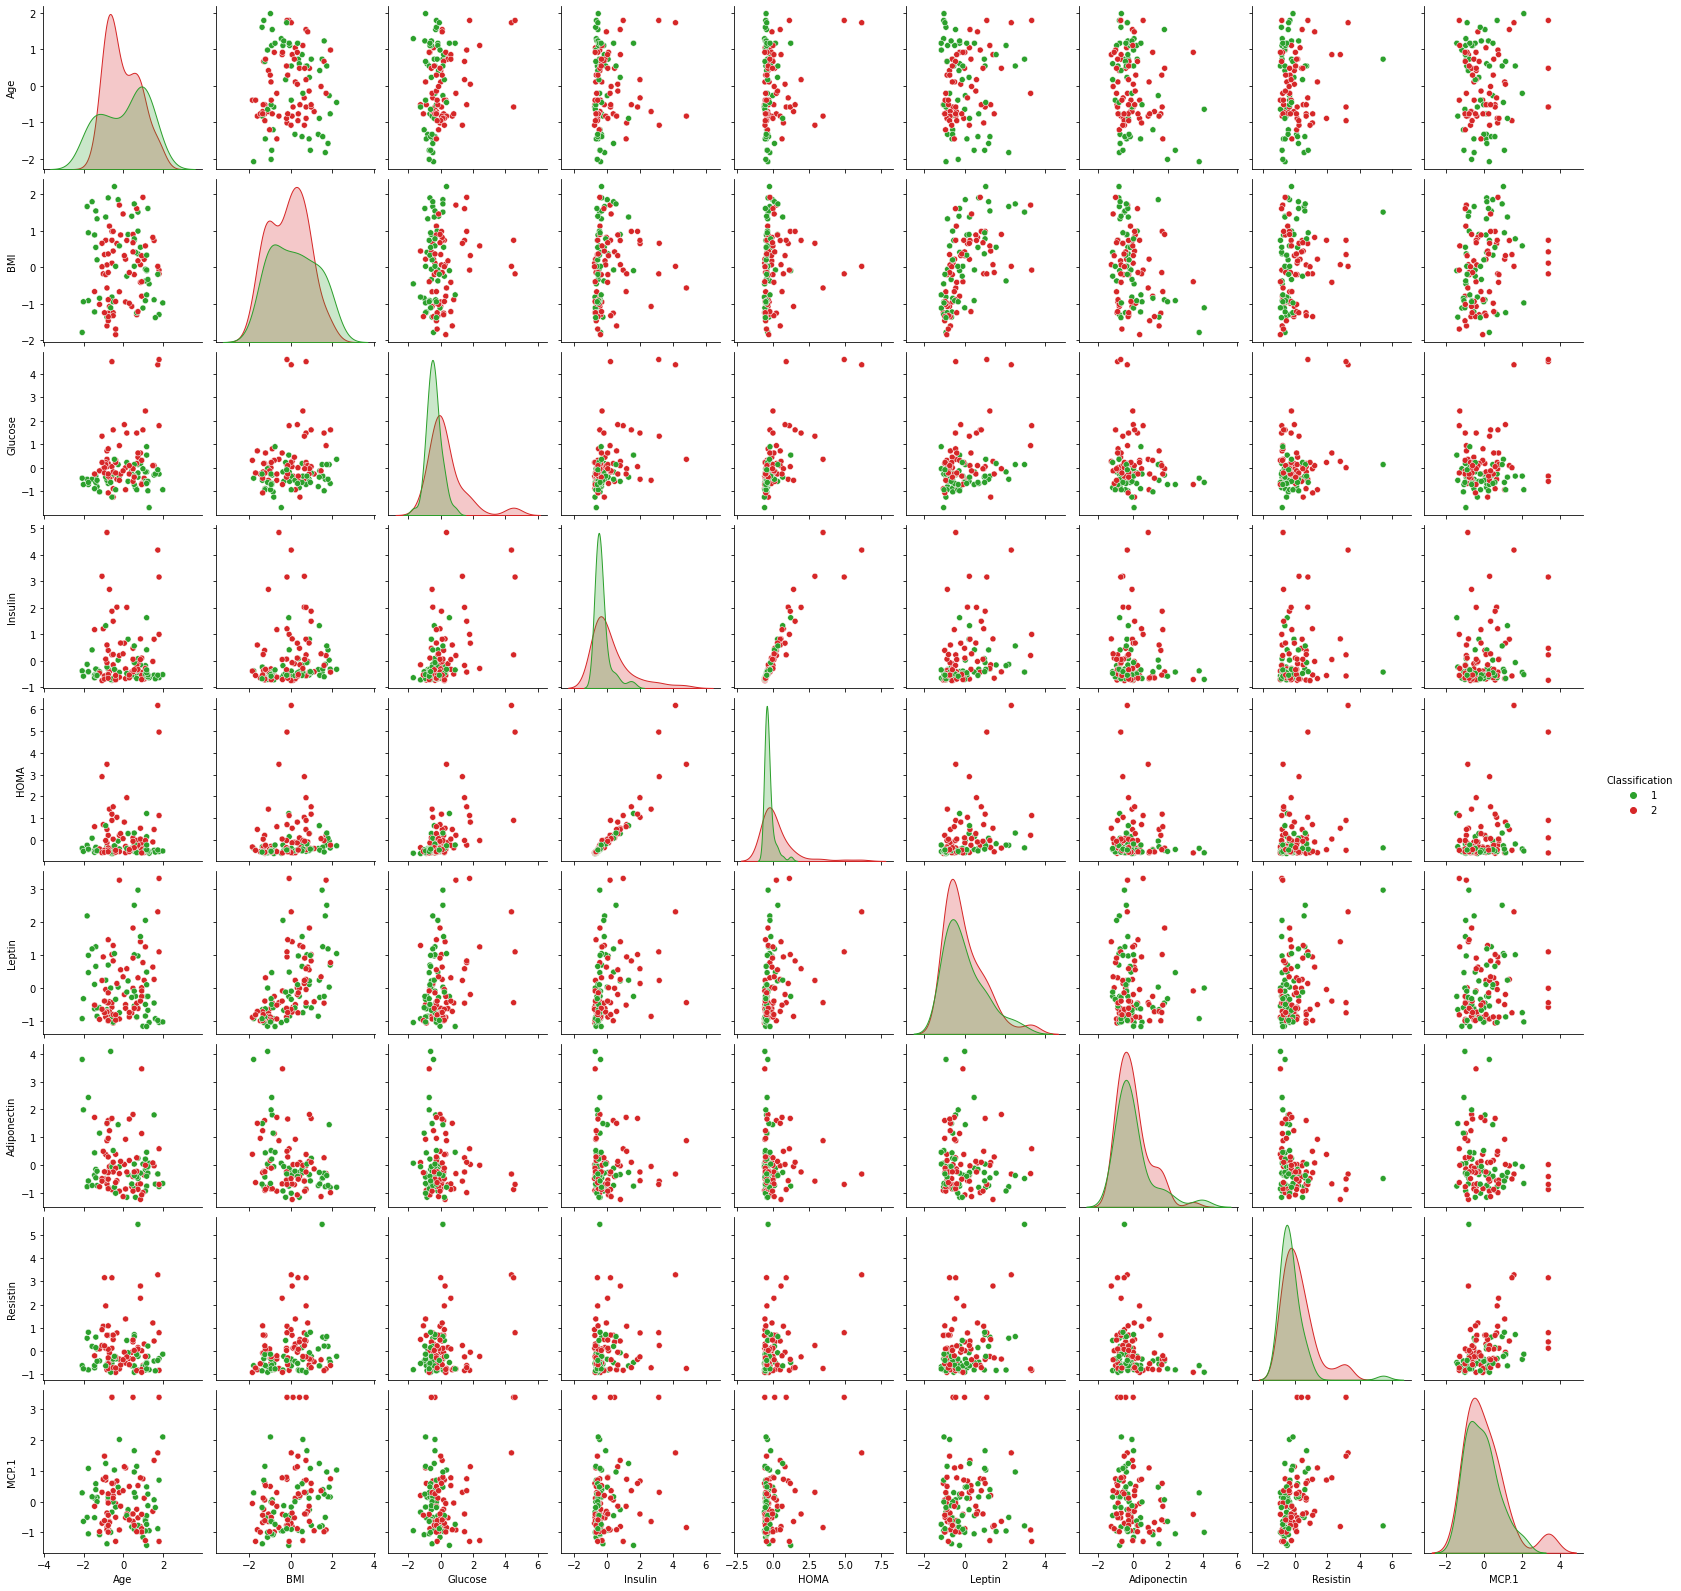

In [4]:
X=DF.iloc[:,:-1].values
y=DF.iloc[:,-1].values
X=StandardScaler().fit_transform(X)
XDFy=pd.DataFrame(X,columns=DF.columns[:-1])
XDFy['Classification']=y
sns.pairplot(XDFy,hue='Classification',palette={1:"tab:green",2:"tab:red"})

# Two Features Plots (QuantileTransformer)

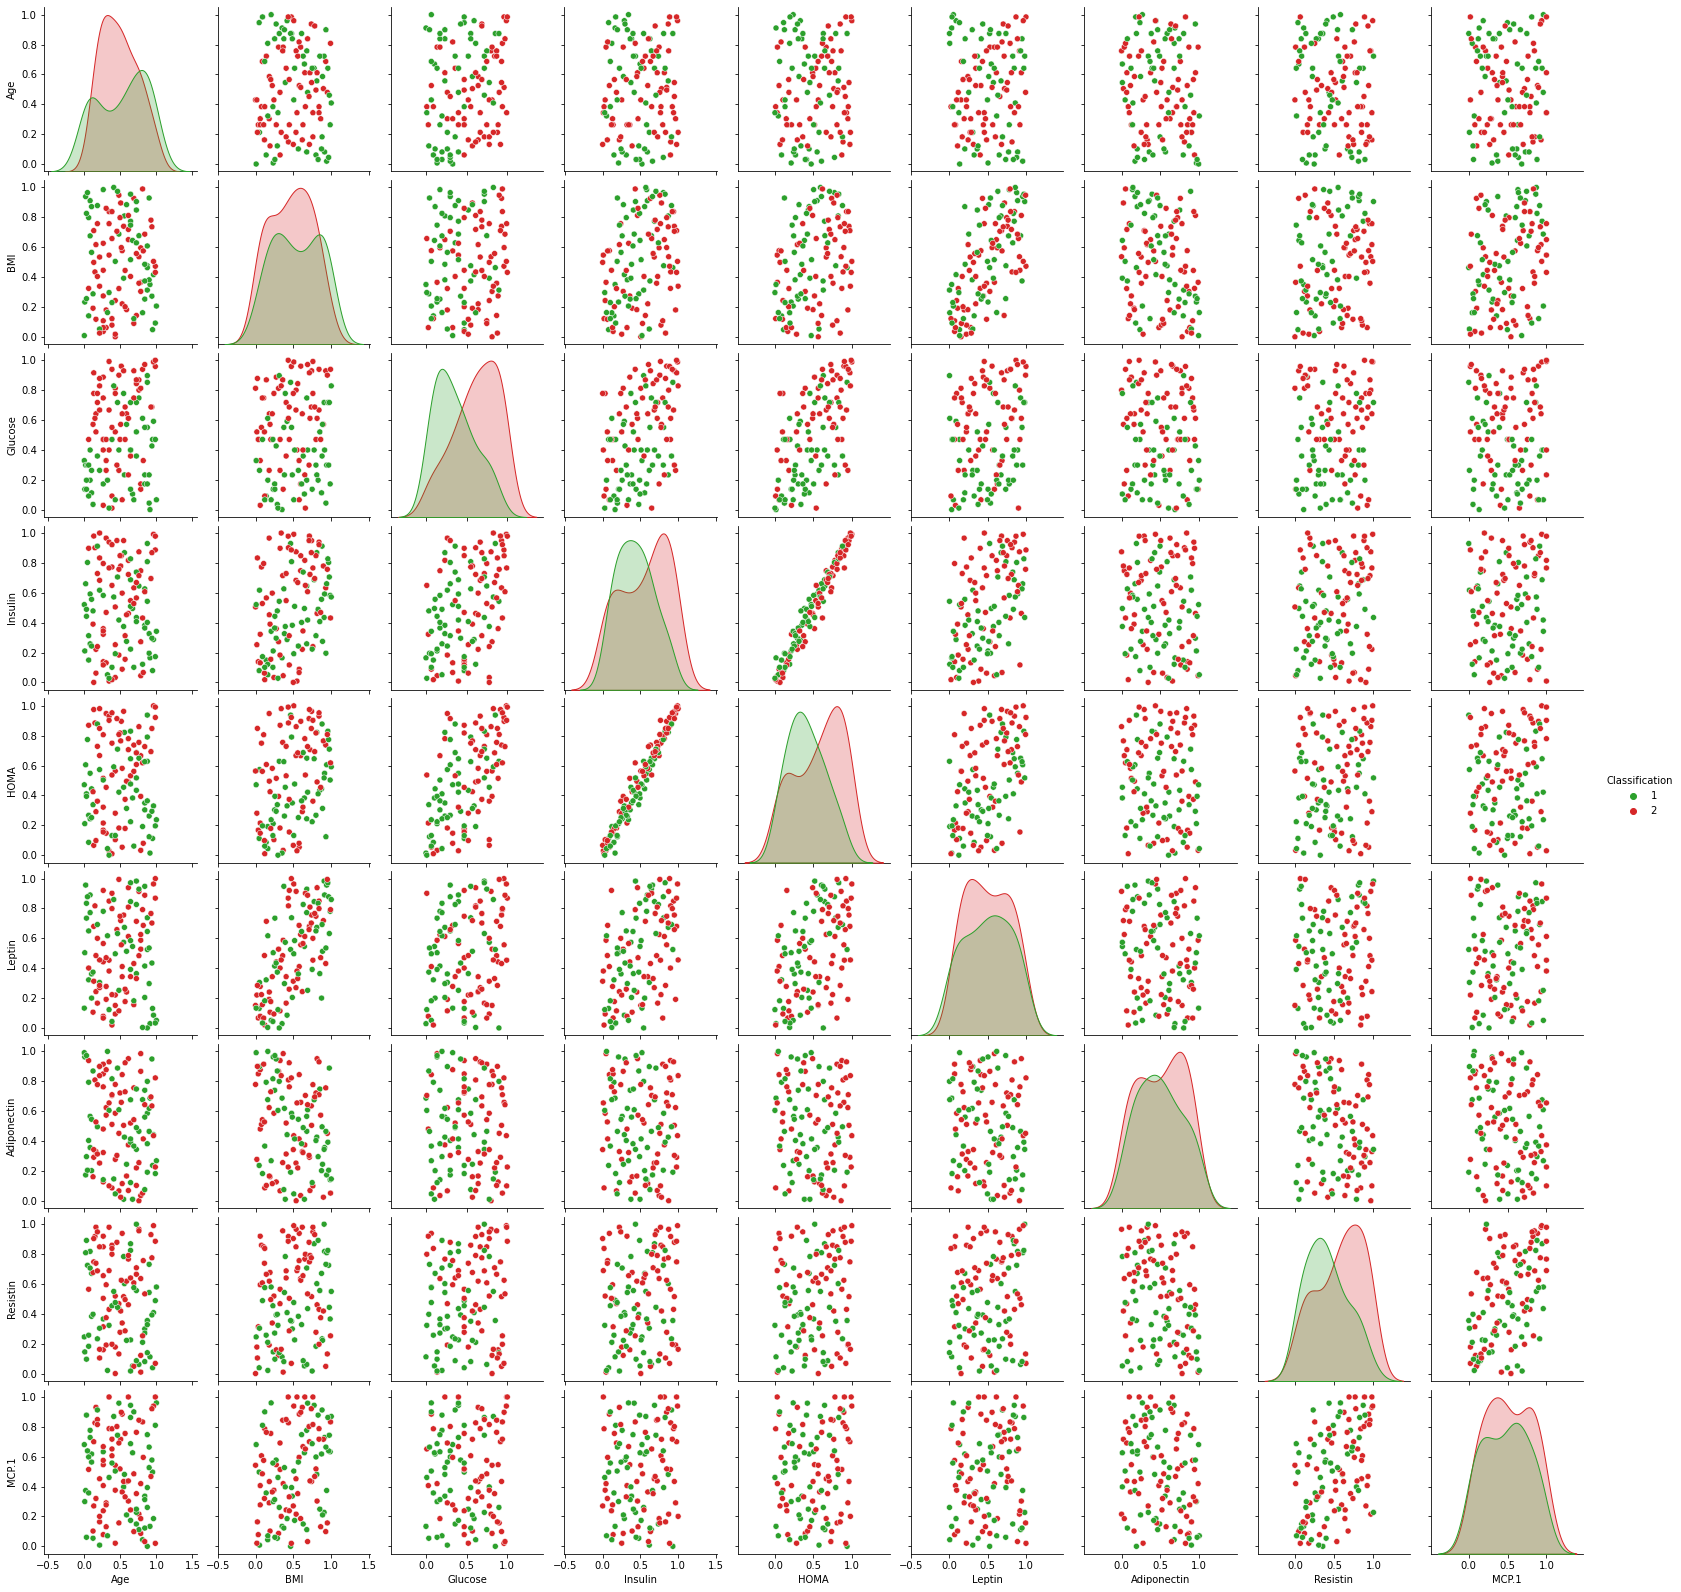

In [16]:
X=DF.iloc[:,:-1].values
y=DF.iloc[:,-1].values
X=QuantileTransformer(n_quantiles=100).fit_transform(X)
XDFy=pd.DataFrame(X,columns=DF.columns[:-1])
XDFy['Classification']=y
sns.pairplot(XDFy,hue='Classification',palette={1:"tab:green",2:"tab:red"})

# Kfold

In [47]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True)
kf.get_n_splits(X,y)
def training_model(model,X,y):
    train_score=[]
    test_score=[]
    for train,test in kf.split(X,y):
        model.fit(X[train],y[train])
        train_score.append(model.score(X[train],y[train]))
        test_score.append(model.score(X[test],y[test]))
    train_mean_score=np.mean(np.array(train_score))
    test_mean_score=np.mean(np.array(test_score))
    return train_mean_score,test_mean_score
AllScores={}

# LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
LogisticModel=LogisticRegression()
AllScores['Logistic Regression']=list(training_model(LogisticModel,X,y))
AllScores

{'Logistic Regression': [0.7607760635811127, 0.7326086956521739]}

# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(10):
    KNNModel=KNeighborsClassifier(n_neighbors=i+1)
    AllScores['KNN(K={})'.format(str(i+1))]=list(training_model(KNNModel,X,y))
AllScores

{'Logistic Regression': [0.7607760635811127, 0.7326086956521739],
 'KNN(K=1)': [1.0, 0.672463768115942],
 'KNN(K=2)': [0.8297568957456756, 0.5945652173913043],
 'KNN(K=3)': [0.8362552594670406, 0.6644927536231884],
 'KNN(K=4)': [0.7499532491818608, 0.6630434782608695],
 'KNN(K=5)': [0.7759233286582516, 0.7065217391304348],
 'KNN(K=6)': [0.7499766245909305, 0.7159420289855072],
 'KNN(K=7)': [0.7823048153342684, 0.6724637681159421],
 'KNN(K=8)': [0.7693314633006079, 0.6630434782608696],
 'KNN(K=9)': [0.7520570359981301, 0.6721014492753623],
 'KNN(K=10)': [0.7715287517531557, 0.6807971014492754]}

# SVM

In [50]:
from sklearn.svm import SVC
SVMModel=SVC()
for i in ['linear','rbf']:
    SVMModel=SVC(kernel=i)
    AllScores['SVM(kernel={})'.format(i)]=list(training_model(SVMModel,X,y))
AllScores

{'Logistic Regression': [0.7607760635811127, 0.7326086956521739],
 'KNN(K=1)': [1.0, 0.672463768115942],
 'KNN(K=2)': [0.8297568957456756, 0.5945652173913043],
 'KNN(K=3)': [0.8362552594670406, 0.6644927536231884],
 'KNN(K=4)': [0.7499532491818608, 0.6630434782608695],
 'KNN(K=5)': [0.7759233286582516, 0.7065217391304348],
 'KNN(K=6)': [0.7499766245909305, 0.7159420289855072],
 'KNN(K=7)': [0.7823048153342684, 0.6724637681159421],
 'KNN(K=8)': [0.7693314633006079, 0.6630434782608696],
 'KNN(K=9)': [0.7520570359981301, 0.6721014492753623],
 'KNN(K=10)': [0.7715287517531557, 0.6807971014492754],
 'SVM(kernel=linear)': [0.7543244506778869, 0.6811594202898551],
 'SVM(kernel=rbf)': [0.8707339878447874, 0.7851449275362319]}

# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
DTCModel=DecisionTreeClassifier()
AllScores['Decision Tree']=list(training_model(DTCModel,X,y))
AllScores

{'Logistic Regression': [0.7607760635811127, 0.7326086956521739],
 'KNN(K=1)': [1.0, 0.672463768115942],
 'KNN(K=2)': [0.8297568957456756, 0.5945652173913043],
 'KNN(K=3)': [0.8362552594670406, 0.6644927536231884],
 'KNN(K=4)': [0.7499532491818608, 0.6630434782608695],
 'KNN(K=5)': [0.7759233286582516, 0.7065217391304348],
 'KNN(K=6)': [0.7499766245909305, 0.7159420289855072],
 'KNN(K=7)': [0.7823048153342684, 0.6724637681159421],
 'KNN(K=8)': [0.7693314633006079, 0.6630434782608696],
 'KNN(K=9)': [0.7520570359981301, 0.6721014492753623],
 'KNN(K=10)': [0.7715287517531557, 0.6807971014492754],
 'SVM(kernel=linear)': [0.7543244506778869, 0.6811594202898551],
 'SVM(kernel=rbf)': [0.8707339878447874, 0.7851449275362319],
 'Decision Tree': [1.0, 0.6822463768115942]}

# Results

In [52]:
AllScores=pd.DataFrame(AllScores)

In [56]:
AllScores.transpose().rename(columns={0:'Train Score',1:'Test Score'})

,Train Score,Test Score
Logistic Regression,0.760776,0.732609
KNN(K=1),1.000000,0.672464
KNN(K=2),0.829757,0.594565
KNN(K=3),0.836255,0.664493
KNN(K=4),0.749953,0.663043
KNN(K=5),0.775923,0.706522
KNN(K=6),0.749977,0.715942
KNN(K=7),0.782305,0.672464
KNN(K=8),0.769331,0.663043
KNN(K=9),0.752057,0.672101
